# Charging Network Enhancement Optimization Model

This notebook implements and solves the mixed-integer linear programming model for optimizing the Kitchener-Waterloo charging network enhancement through:

1. Model Implementation
   - Decision variable definition
   - Constraint formulation
   - Objective function development
   - Gurobi model construction

2. Scenario Analysis
   - Base case optimization
   - Budget sensitivity analysis
   - Coverage requirement variations
   - Phasing strategy options

3. Solution Analysis
   - Result visualization
   - Cost-benefit analysis 
   - Coverage improvement assessment
   - Implementation recommendations

In [13]:
# Setup and imports
import json
import logging

# Local imports 
from src.data.constants import *
from src.data.data_manager import DataManager
from src.model.utils import *
from src.model.network_optimizer import EVNetworkOptimizer
from src.visualization.optimization_viz import *

# Configure logging
logging.getLogger('gurobipy').setLevel(logging.ERROR)
logging.getLogger('data_manager').setLevel(logging.ERROR)

# Initialize data manager
data_mgr = DataManager()

# Load configuration
config_path = PROJECT_ROOT / 'configs' / 'base.json'
with open(config_path) as f:
    base_config = json.load(f)

print("Setup complete!")

Setup complete!


## 1. Data Preparation and Model Setup
First, let's prepare our data and initialize the optimization model

In [14]:
# Prepare input data
print("üîÑ Preparing optimization data...")
input_data = data_mgr.prepare_optimization_data()

üîÑ Preparing optimization data...

                         üìä PREPARING OPTIMIZATION DATA                          

--------------------------------------------------------------------------------
                   üîÑ OPT-PREP-STEP 1.1: LOADING BASE DATA...                    
--------------------------------------------------------------------------------
üì¶ Found population data from 2024-11-23 20:15:26!
üìÇ /u1/a9dutta/co370/kw-ev-charging-optimization/data/raw/population/population_2024-11-23_20-15-26.geojson

üöö Collecting Population Data from Available Sources...
--------------------------------------------------------------------------------

1Ô∏è‚É£ - Region of Waterloo Census Data:
--------------------------------------------------------------------------------
    üìä Regional Summary:
    --------------------------------------------------------------------------
    Total Population: 637,730
    Total Area: 1382.1 km¬≤
    Average Regional Density: 461.4 peopl

INFO:src.data.data_manager:Total population: 637,730
INFO:src.data.data_manager:Covered population: 637,040
INFO:src.data.data_manager:Total population: 637,730
INFO:src.data.data_manager:Covered population: 485,640


‚úì Processed 7705 potential sites!

--------------------------------------------------------------------------------
              üìè OPT-PREP-STEP 4: CALCULATING DISTANCE MATRICES...               
--------------------------------------------------------------------------------


Site-to-Demand Distance: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7705/7705 [00:29<00:00, 257.91it/s]



Matrix Dimensions:
- Distance matrix: (7705, 379)
- Number of stations: 183
- Number of demand points: 379
- Number of potential sites: 7705

Distance Statistics:
- Mean distance: 8.26 km
- Max distance: 44.09 km
- Min distance: 0.00 km

Theoretical Coverage Possible with respect to:
 - Unlimited Budget
 - Existing Site Capacity
 - Existing Grid Capacity
 - Existing Charging Speed
 - Existing Potential Sites

We could achieve:
 - L2 Stations (with only L2 charging ports): 95.51%
 - L3 Stations (with L2 & L3 charging ports): 98.42%


In [15]:
# Initialize optimizer
print("\nü§ñ Initializing optimizer...")
optimizer = EVNetworkOptimizer(input_data, base_config)


ü§ñ Initializing optimizer...


In [16]:
# Program documentation
print("\nüìù Getting model documentation...")
program_doc = optimizer.get_program_doc()
program_doc_summary = get_program_doc_summary(program_doc, display=True)


üìù Getting model documentation...

              EV CHARGING NETWORK ENHANCEMENT OPTIMIZATION PROGRAM              

--------------------------------------------------------------------------------
                                1. DATA SUMMARY                                 
--------------------------------------------------------------------------------

Network Infrastructure:
+---------------+--------+-----------------------------------------------------+
|   Component   |  Size  | Description                                         |
+===============+========+=====================================================+
| Demand Points |  379   | Population demand points Weighted by:   ‚Ä¢ EV        |
|               |        | Adoption (35%)   ‚Ä¢ Infrastructure Quality (25%)   ‚Ä¢ |
|               |        | Population Density (20%)   ‚Ä¢ Transit Access (15%)   |
|               |        | ‚Ä¢ Infrastructure Age (5%)                           |
+---------------+--------+---------

## 2. Base Case Optimization
Now let's run our base case optimization and analyze the results:

In [17]:
# Run optimization
print("‚ú® Running base case optimization...")
solution = optimizer.optimize()

‚ú® Running base case optimization...

1. Setting up optimization model...
‚úì Model parameters configured
‚úì Decision variables created
‚úì Constraints added
‚úì Objective function set

2. Starting optimization...

3. Processing optimal solution...
‚úì Found 4 L2 -> L3 upgrades!
‚úì Found 44 new L2 stations!
‚úì Found 11 new L3 stations!

4. Creating detailed solution...
‚úì Station statuses updated
‚úì Solution creation complete!


In [18]:
# Get optimization results
solution_summary = get_solution_summary(solution, display=True)


              EV CHARGING NETWORK ENHANCEMENT OPTIMIZATION RESULTS              

          Date:                                    2024-12-25 16:10:04          
          Scenario:                                               Base          
          Status:                                              optimal          
          Objective Value:                                       88.58          

--------------------------------------------------------------------------------
                                COVERAGE UPDATES                                
--------------------------------------------------------------------------------
+-----------------+-----------+---------+----------+
| Coverage Type   |   Initial |   Final |   Change |
+=================+===========+=========+==========+
| Level 2         |    14.57% |  96.14% |  +81.57% |
+-----------------+-----------+---------+----------+
| Level 3         |     1.78% |  85.40% |  +83.62% |
+-----------------+-----------+

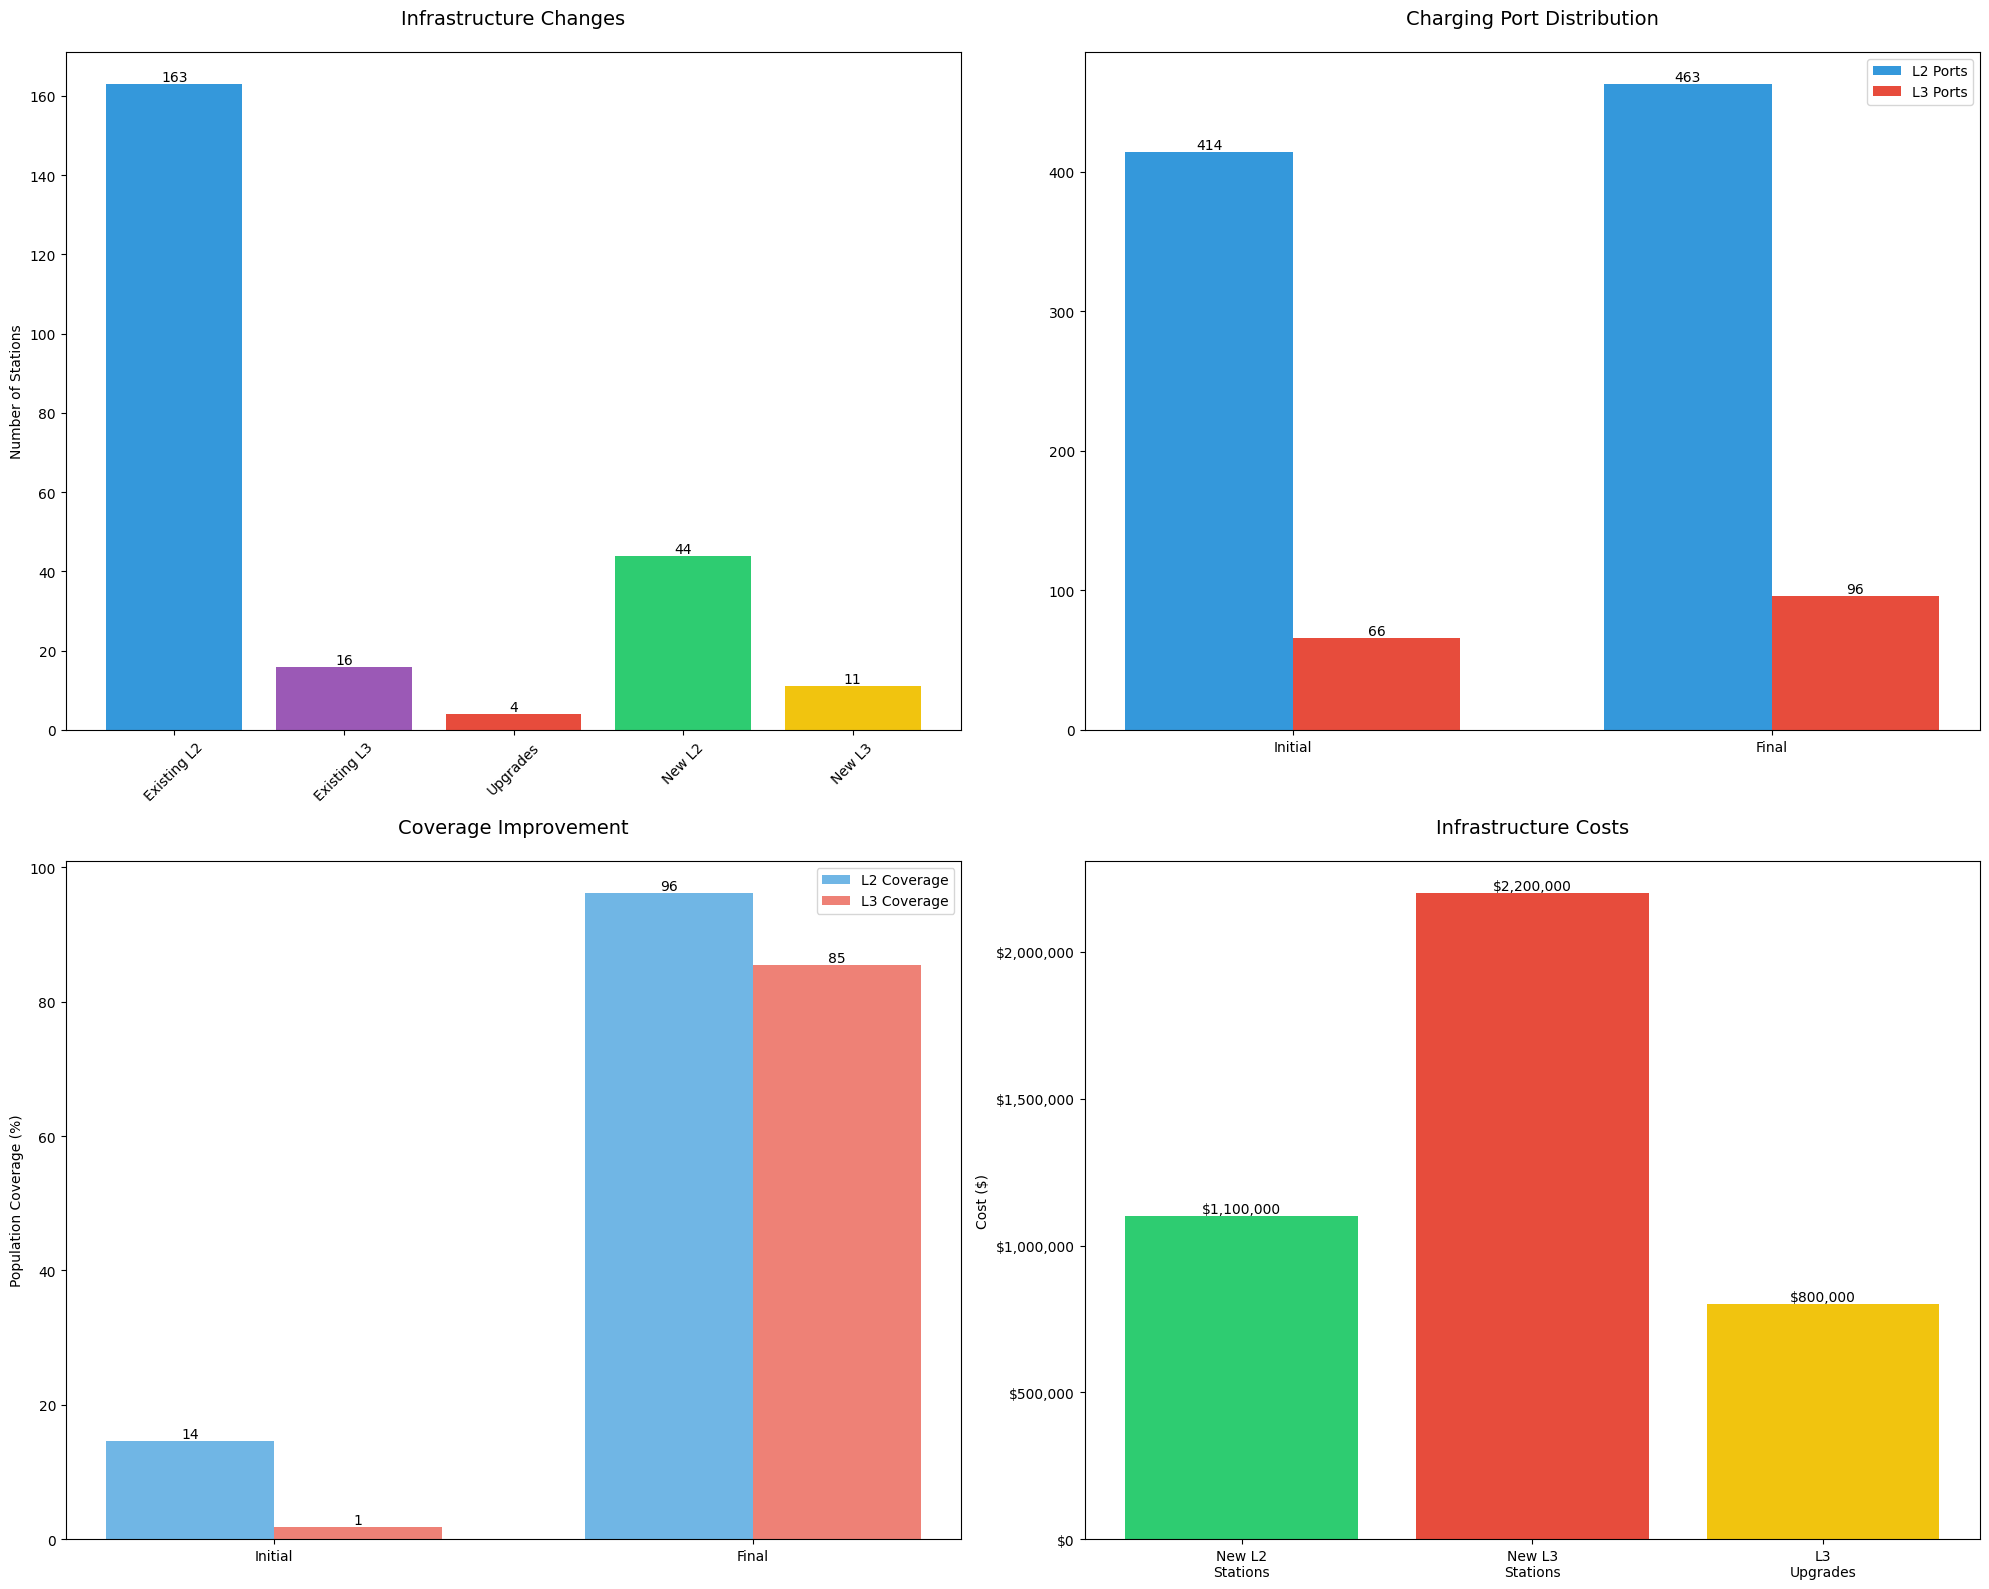

In [19]:
# Visualize optimization results
solution_plot = plot_optimization_results(solution, base_config)
display(solution_plot)

In [20]:
# Display map
map_plot = create_results_map(solution, base_config)
draw_map(map_plot)

## 3. Sensitivity Analysis
Let's analyze how our solution changes with different parameters:

In [21]:
# Run sensitivity analysis
sensitivity_results = optimizer.perform_sensitivity_analysis()
sensitivity_results_summary = get_sensitivity_results_summary(sensitivity_results, display=True)


                          SENSITIVITY ANALYSIS SUMMARY                          

--------------------------------------------------------------------------------
                              Constraint Analysis                               
--------------------------------------------------------------------------------
+--------------+---------------+---------------+--------------+-------------+
| Constraint   |   Utilization |         Slack |          RHS |   Status    |
+==============+===============+===============+==============+=============+
| Budget       |    99.875000% | +5,000.000000 | 4,000,000.00 | Non-Binding |
+--------------+---------------+---------------+--------------+-------------+
| L2 Coverage  |   101.205179% |     -0.011449 |         0.95 | Non-Binding |
+--------------+---------------+---------------+--------------+-------------+
| L3 Coverage  |   100.469404% |     -0.003990 |         0.85 | Non-Binding |
+--------------+---------------+---------------+--

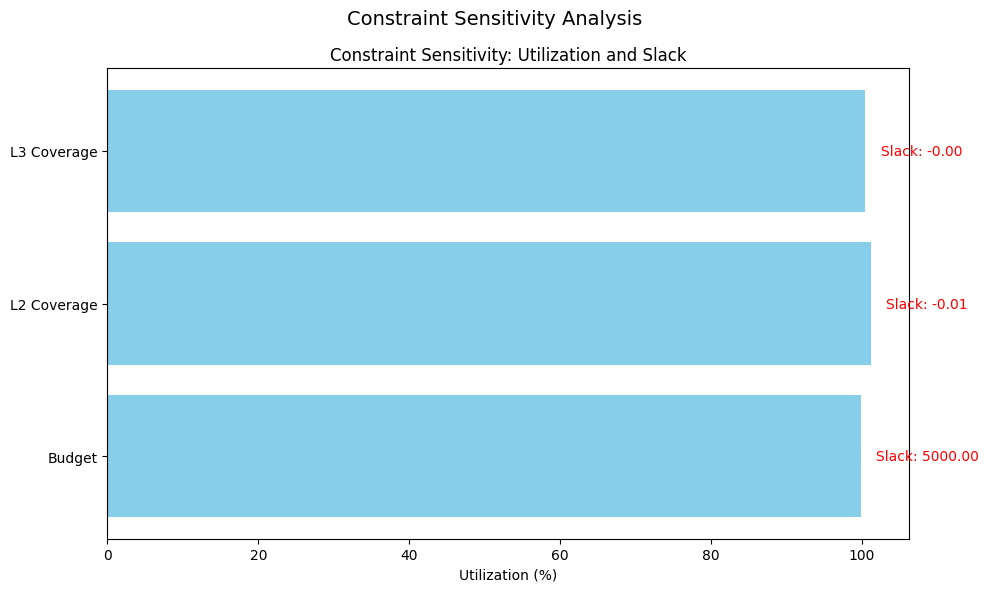

In [22]:
# Create visualization
sensitivity_plots = plot_sensitivity_analysis(sensitivity_results)
display(sensitivity_plots)

## 4. Implementation Planning
Based on our optimization results, let's develop a phased implementation plan:

In [23]:
# Create and display implementation plan
implementation_summary, implementation_plan = get_implementation_plan(solution, display=True)


                              IMPLEMENTATION PLAN                               

--------------------------------------------------------------------------------
                                 Phase Details                                  
--------------------------------------------------------------------------------

Phase 1: L2 to L3 Upgrades
   ‚Ä¢ Convert existing L2 stations to L3
   ‚Ä¢ Install new L3 ports
   ‚Ä¢ Upgrade electrical infrastructure

Phase 2: New L3 Stations
   ‚Ä¢ Install new L3 stations
   ‚Ä¢ Add L3 charging ports
   ‚Ä¢ Implement grid connections

Phase 3: New L2 Network
   ‚Ä¢ Install new L2 stations
   ‚Ä¢ Add L2 charging ports
   ‚Ä¢ Complete network coverage

--------------------------------------------------------------------------------
                            Detailed Phase Analysis                             
--------------------------------------------------------------------------------
+---------+------------+---------+-----------+-------

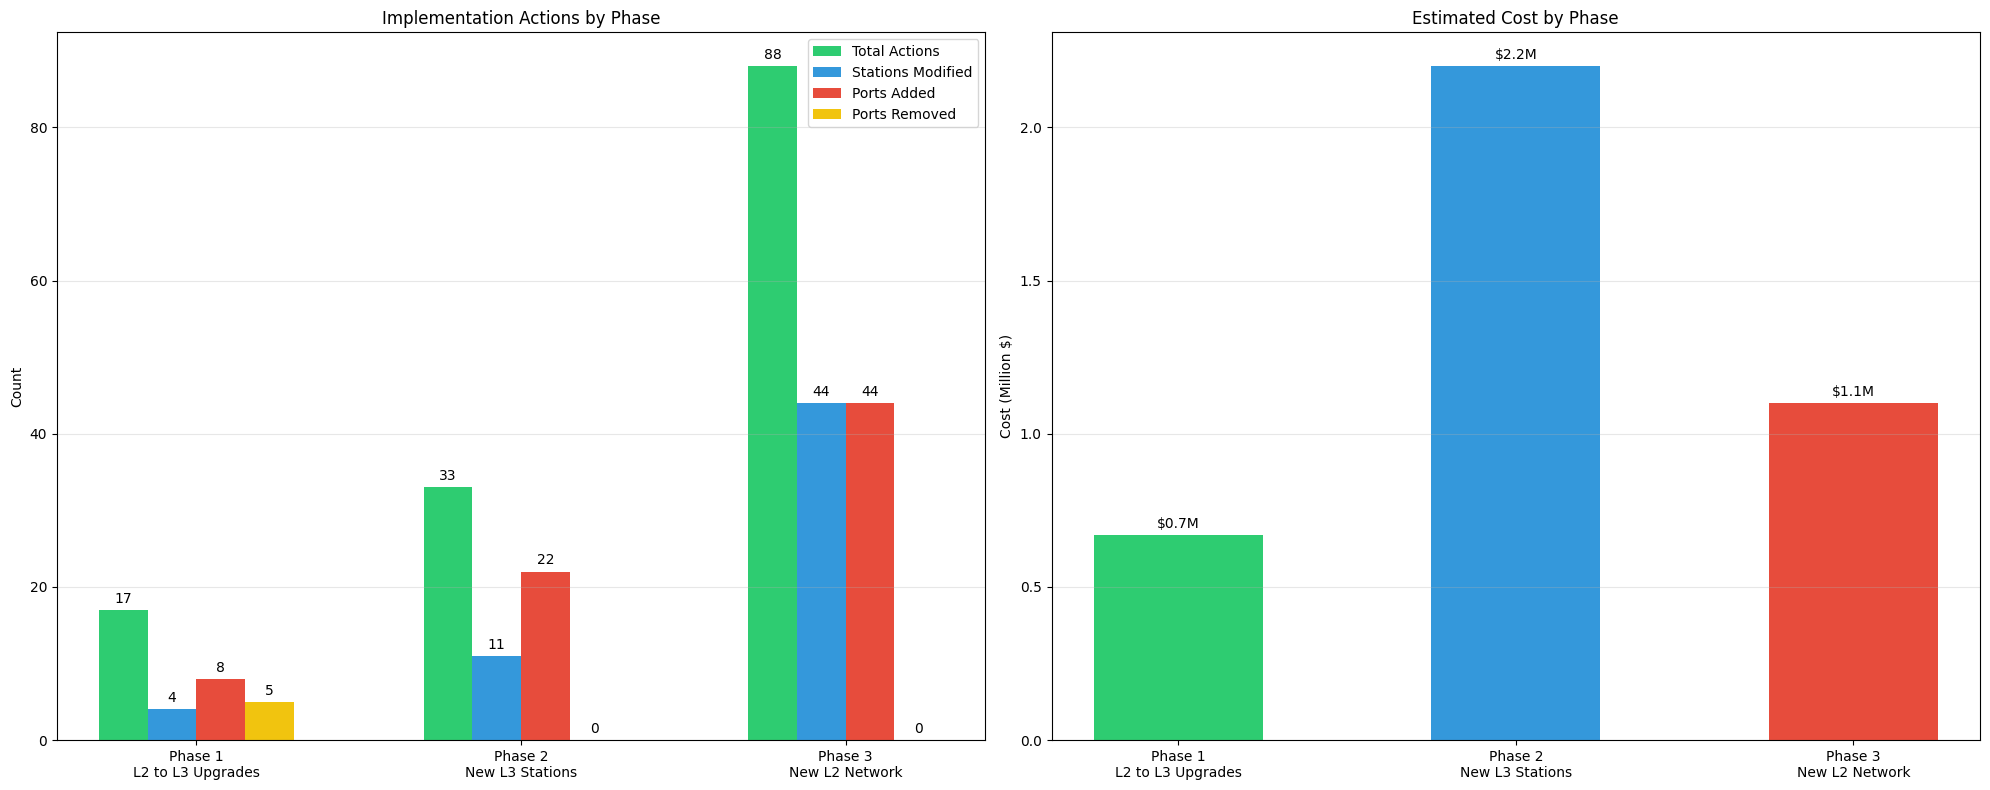

In [24]:
plot_implementation_plan(implementation_plan)

## 5. Recommendations and Next Steps

Based on our analysis, here are the key recommendations for implementation:

1. Phase 1 (Months 1-4):
   - Focus on L3 upgrades
   - Target high-traffic areas first
   - Verify grid capacity at upgrade locations

2. Phase 2 (Months 5-8):
   - Deploy new L3 stations
   - Coordinate with utility providers
   - Begin site preparation work

3. Phase 3 (Months 9-12):
   - Complete L2 network expansion
   - Monitor usage patterns
   - Adjust port allocations based on demand

Key considerations for successful implementation:
- Coordinate with utility providers early
- Develop contingency plans for construction delays
- Monitor actual usage patterns to validate model assumptions
- Consider weather impacts on construction timeline